In [49]:
#LightGBMのインストール
!pip install LightGBM

In [50]:
# 必要なライブラリのインストール
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import time

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
#グラフ日本語表示用のパッケージ
import japanize_matplotlib

In [38]:
#ボストン住宅価格データ（CSV）の読み込み
#犯罪発生率付のデータ（現在は廃止）
df = pd.read_csv('./datafile/BostonHousing.csv')
#先頭3行表示
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [54]:
print(df.shape) 
print(df.dtypes) 
print(df.isnull().sum()) 

(506, 14)
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [70]:
heat_map

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


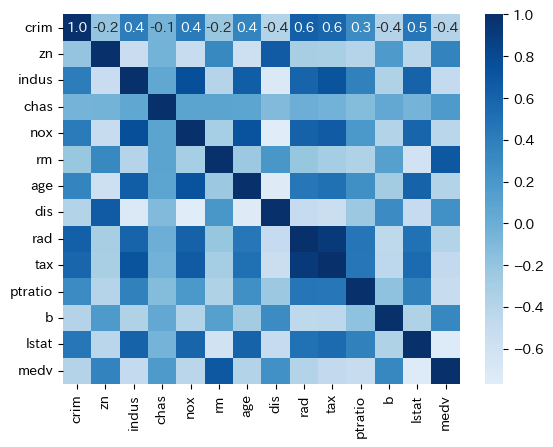

In [69]:
#ヒートマップで可視化
heat_map = df.corr(method="pearson")
sns.heatmap(heat_map, center=0, annot=True, cmap="Blues", fmt="1.1f")
plt.show()

In [39]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [40]:
#説明変数と目的変数に分ける
x = df.drop('medv', axis = 1)
y = df['medv']

# 訓練データとテストデータに分ける
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# LightGBM用のデータセットに入れる
lgb_train = lgb.Dataset(x_train, y_train)
lgb.test = lgb.Dataset(x_test, y_test)

# 評価基準を設定する 
params = {'metric' : 'rmse'}

In [45]:
# 訓練データから回帰モデルを作る

#学習
gbm = lgb.train(params, lgb_train)
# テストデータを用いて予測値を求める
test_predicted = gbm.predict(x_test)
#真の価格と予想価格を列で連結したデータセット
predicted_df = pd.concat([y_test.reset_index(drop=True), pd.Series(test_predicted)], axis = 1)
#列名を設定
predicted_df.columns = ['真の価格', '予想価格']

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.374753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [46]:
# 予測値を図で確認する関数の定義
def Prediction_accuracy(predicted_df):
    RMSE = np.sqrt(mean_squared_error(predicted_df['真の価格'], predicted_df['予想価格']))
    plt.figure(figsize = (7,7))
    ax = plt.subplot(111)
    ax.scatter('真の価格', '予想価格', data = predicted_df)
    ax.set_xlabel('真の価格', fontsize = 20)
    ax.set_ylabel('予想価格', fontsize = 20)
    plt.tick_params(labelsize = 15)
    x = np.linspace(5, 50)
    y = x
    ax.plot(x, y, 'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE,3))),transform = ax.transAxes, fontsize = 15)

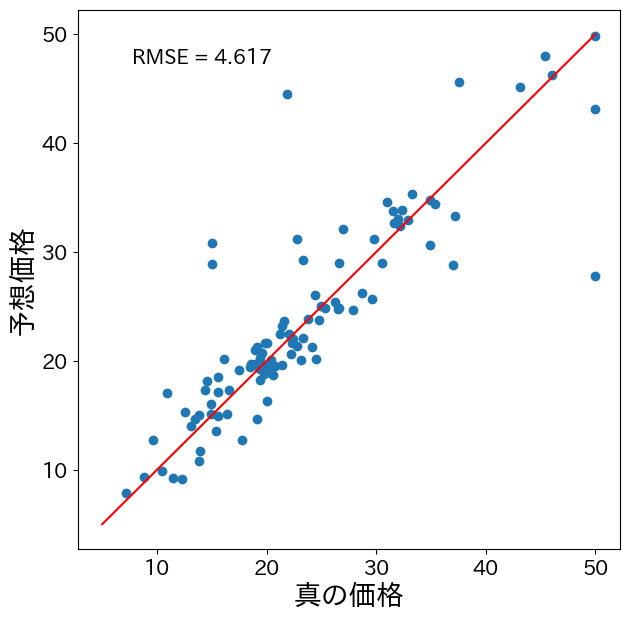

In [47]:
# 予測値を図で確認する
Prediction_accuracy(predicted_df)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

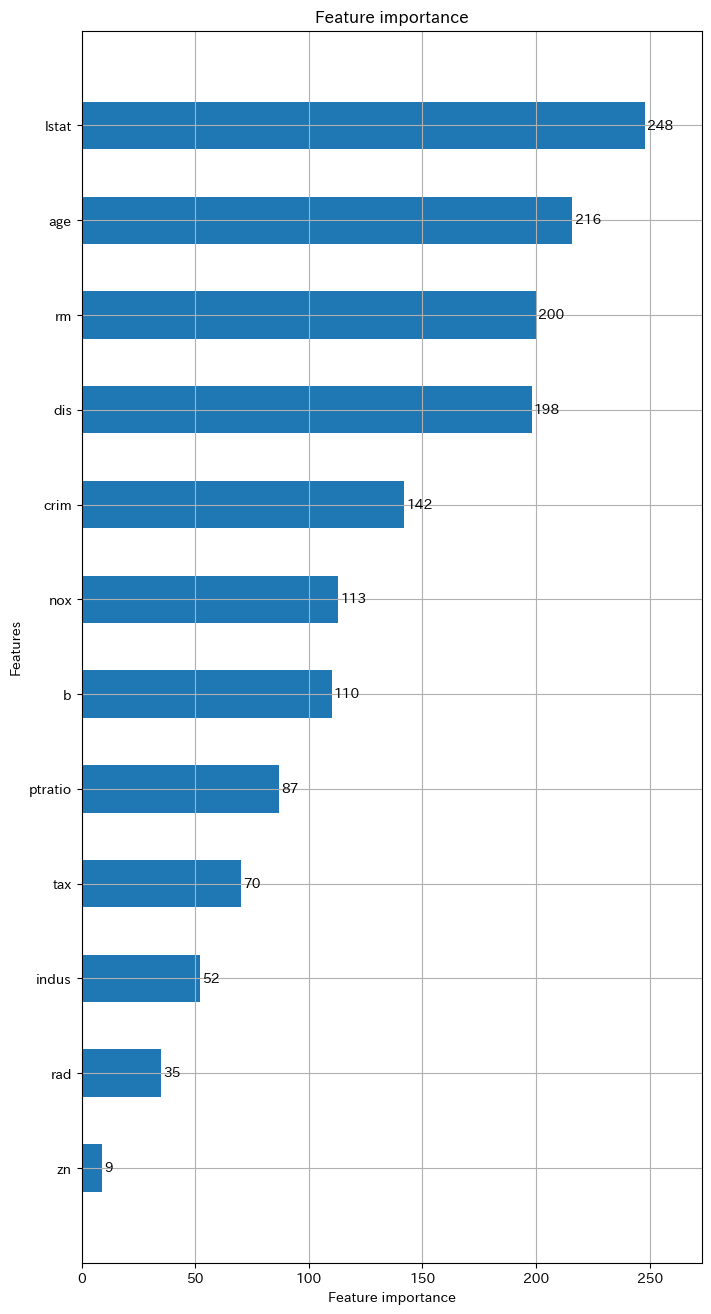

In [48]:
# 特徴量の重要度を確認
lgb.plot_importance(gbm, height = 0.5, figsize = (8,16))

以下はGraphvizのインストールが必要

In [ ]:
# 決定木の分岐の可視化
# 最後の数字でleaf番号を指定
lgb.create_tree_digraph(gbm, 1)